In [1]:
import pylayers.gis.ezone as ez
from pylayers.gis.gisutil import ent,ext2qt
import matplotlib.pyplot as plt
import numpy as np

In [2]:
%matplotlib inline

http://www.pylayers.org

# Geographical Information and the Earth Zone class : `Ezone`

The `Ezone` class handles an earth zone which corresponds to the `strm` or `aster` DEM data. It has the same naming convention as `srtm` files
and corresponds to a portion of earth corresponding to 1° latitude and 1° of longitude.
An `Ezone` is an heterogeneous dataset stored in `hdf5` format. 
Let see an example with the file `N48W002.h5`. 

By default files are placed in directory `gis/h5` of the current project tree. 

The command h5ls allows to see the hierarchical structure of the file

In [3]:
!h5ls $BASENAME/gis/h5/N48W002.h5

bldg                     Group
dem                      Group
extent                   Dataset {4}


Invoquing an earth zone requires to specify the tile prefix with the same naming convention as with SRTM files. For example let consider the earth zone from -2 to -1 in west longitude and from 48 to 49 in North latitude this corresponds to the `N48W002` tile, so the ezone `z` is invoqued as : 

In [4]:
z = ez.Ezone('N48W002')

In this initial phase no data is loaded yet, to load all the data gathered for this `Ezone` in an existing HDF5 file let invoque the `loadh5` method.  

In [5]:
z.loadh5()

In [6]:
z

N48W002
--------
[-2 -1 48 49]
latlon : [ 0.000 73676.623 cartesian :0.000 111194.358 ]

Buildings 
--------- 
i-longitude : 64 96
i-latitude  : 19 38

This object contains the srtm DEM data, the aster data and a filtration of the `open street map` database selecting only the ways with `building` attribute. Let's have a look to the data with the `show` method.  

In [7]:
ltiles = ext2qt(z.extent,z.lL0)

(<matplotlib.figure.Figure at 0x7f3f4c8cc610>,
 <matplotlib.axes.AxesSubplot at 0x7f3f4c8ccb10>)

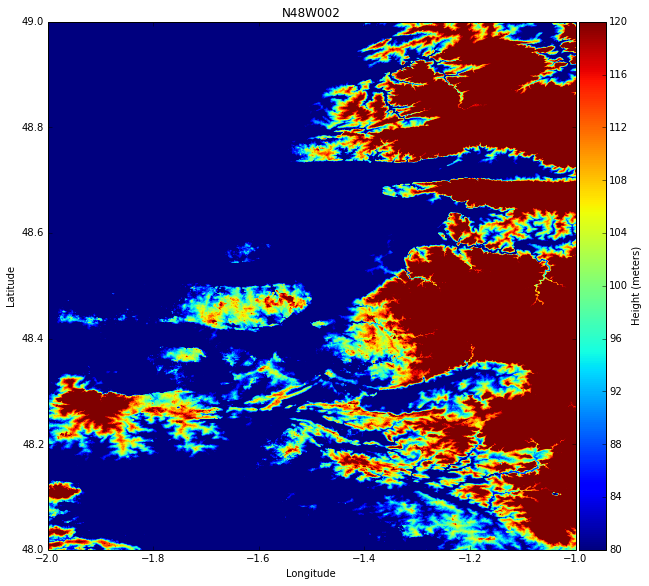

In [8]:
z.show(source='srtm',bldg=False,height=True,clim=[80,120])

The `Ezone` object has a member extent which gives [lonmin,lonmax,latmin,latmax] 

In [9]:
z.extent

array([-2, -1, 48, 49])

The shape of hgta data is larger (3601,3601) than the srtm data (1201,1201)

In [10]:
z.hgta.shape

(3601, 3601)

In [11]:
z.hgts.shape

(1201, 1201)

The aster DEM can also be shown. 

(<matplotlib.figure.Figure at 0x7f3f4f30fdd0>,
 <matplotlib.axes.AxesSubplot at 0x7f3f4e6e7590>)

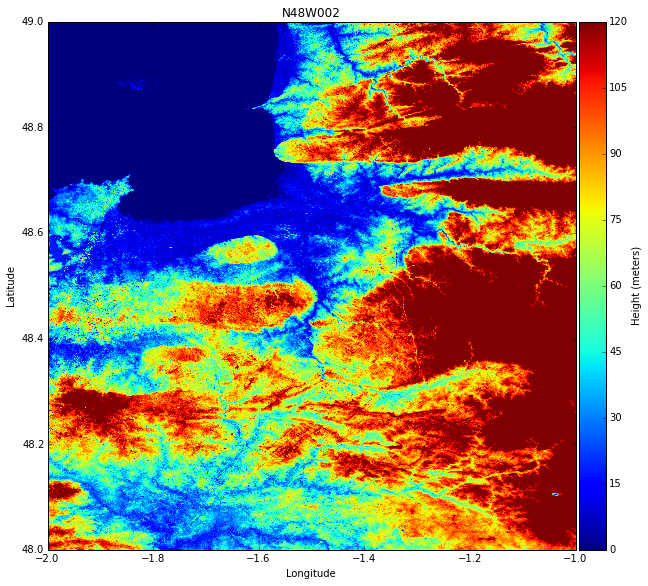

In [12]:
z.show(source='aster',bldg=False,clim=[0,120])

An earth zone has an attached dictionnary of buildings, which contains the data of all the set of building footprints of the city extracted out of open street map data. Below is shown an example for the city of Rennes in Brittany (France). 

## Zooming in 

For zooming into a smaller region, we define the zone to vizualize a given rectangular region with 
`(lonmin,lonmax,latmin,latmax)`. 

This region can be converted into cartesian coordinates with the `conv` method. 

In [13]:
extent1 = (-1.8,-1.6,48.05,48.15)
extent1_cart  = ez.conv(extent1,z.m)
print "latlon extent :",extent1
print "Cartesian extent (meters):",extent1_cart

latlon extent : (-1.8, -1.6, 48.05, 48.15)
Cartesian extent (meters): [ 14902.21631869  29782.9577558    5482.53114884  16563.42201909]


Once the selected extent has been chosen, it is possible to pass it to the `show` method for zooming in the map. 

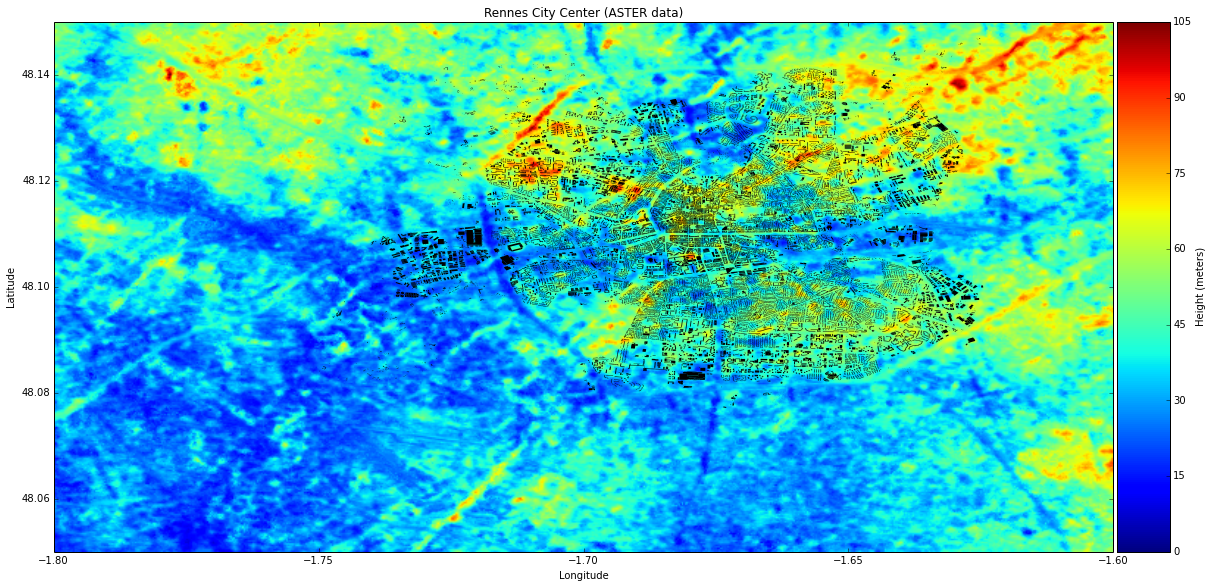

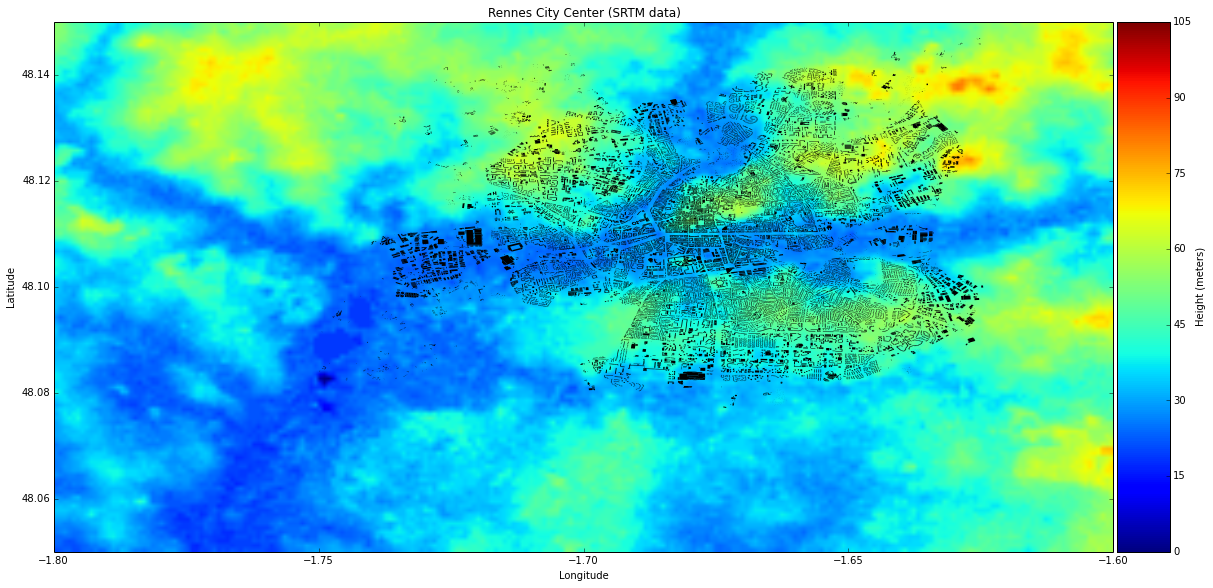

In [14]:
f,a = z.show(title='Rennes City Center (ASTER data)',
             extent=extent1,
             bldg=True,
             height=True,
             contour=False,
             source='aster',
             clim=[0,105],
             figsize=(20,20)
             )
f,a = z.show(title='Rennes City Center (SRTM data)',
             extent=extent1,
             bldg=True,
             height=True,
             contour=False,
             source='srtm',
             clim=[0,105],
             figsize=(20,20)
             )

The maps diplayed above are labeled in longitude (horizontal axis) and latitude (vertical axis) but it is also possible to label it in cartesian coordinates as below

In [15]:
z.rebase()
z.tocart()

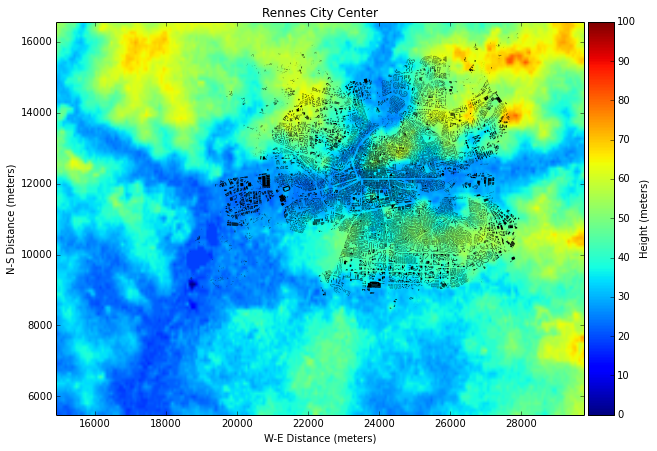

In [16]:
f,a = z.show(title='Rennes City Center',
             extent=extent1_cart,coord='cartesian',
             bldg=True,height=True,
             clim=[0,100])

Let zoom to the University of Rennes 1 campus in the North-East region of the city.

In [17]:
extent2 = (-1.645,-1.62,48.111,48.125)
extent2_cart = ez.conv(extent2,z.m)
print extent2
print extent2_cart

(-1.645, -1.62, 48.111, 48.125)
[ 26436.36082372  28294.87716101  12232.14024036  13785.67272683]


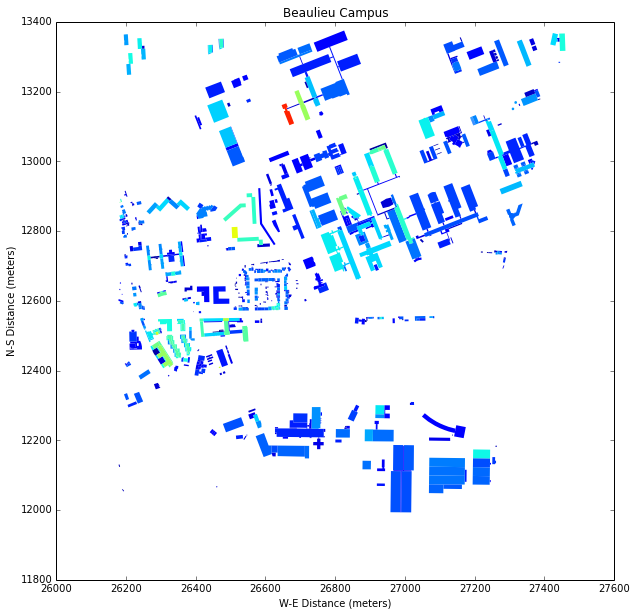

In [18]:
f,a = z.show(title='Beaulieu Campus',
             extent=extent2_cart,
             coord='cartesian',
             height=False,
             bldg=True,
             clim=[0,40])

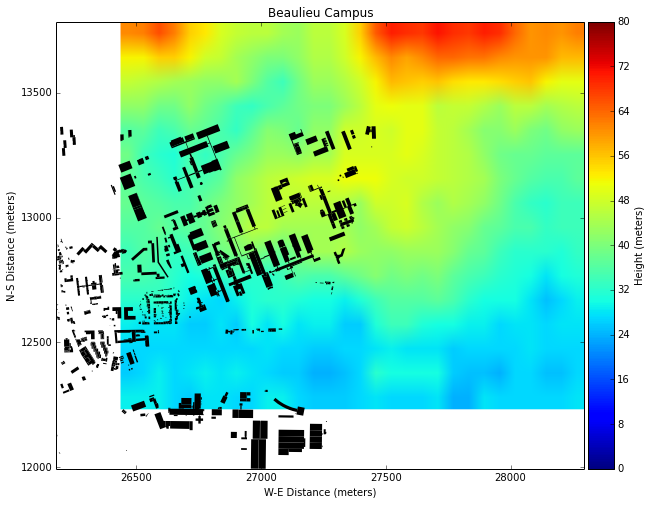

In [19]:
f,a = z.show(title='Beaulieu Campus',
             extent=extent2_cart,
             coord='cartesian',
             bldg=True,
             height=True,
             clim=[0,80])

## Ground Height Profile Extraction 

For predicting the radio propagation, it is necessary to retrieve the height profile between 2 points on the earth surface. The `profile` method does a profile extraction and geometrical calculation for further propagation loss determination using the Deygout method. Points have to be expressed in (lon,lat) coordinates in WGS84 system.

In [20]:
h,d,dh,nu,num,m,LOS = z.profile(pa=(-1.645,48.111),
                                pb=(-1.62,48.325),
                                fGHz=0.3,
                                source='srtm')

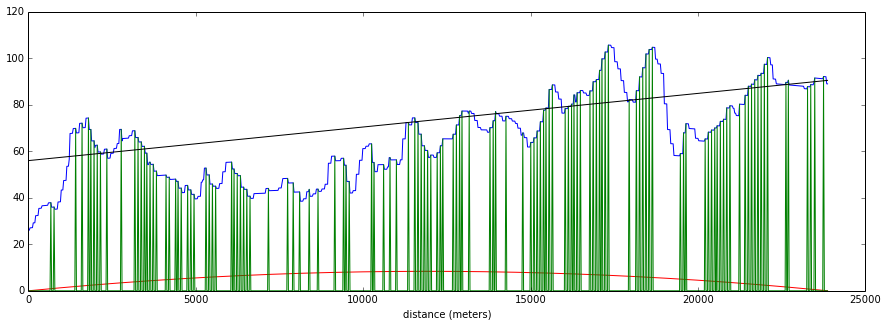

In [21]:
f = plt.figure(figsize=(15,5))
a=plt.plot(d,dh,'r',d,h,'b',d,m[0,:],'g',d,LOS,'k')
plt.xlabel('distance (meters)')

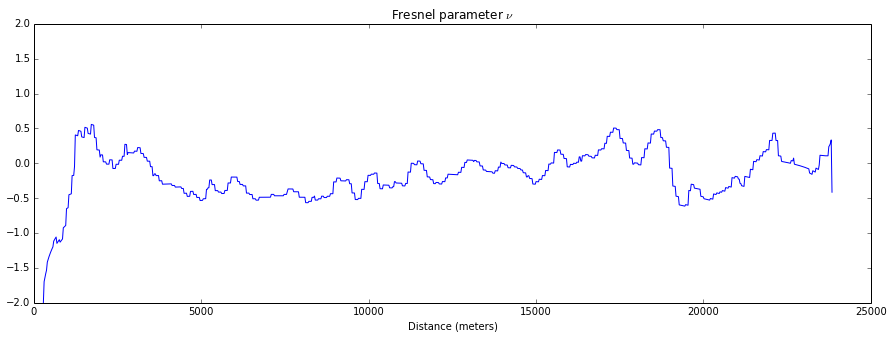

In [22]:
f = plt.figure(figsize=(15,5))
a=plt.plot(d,nu)
a = plt.axis([0,25000,-2,2])
plt.title(r'Fresnel parameter $\nu$')
plt.xlabel('Distance (meters)')

In [23]:
z

N48W002
--------
[-2 -1 48 49]
latlon : [ 0.000 73676.623 cartesian :0.000 111194.358 ]

Buildings 
--------- 
i-longitude : 64 96
i-latitude  : 19 38

/home/uguen/anaconda/lib/python2.7/site-packages/matplotlib/delaunay/triangulate.py:104: DuplicatePointWarning: Input data contains duplicate x,y points; some values are ignored.
  DuplicatePointWarning,


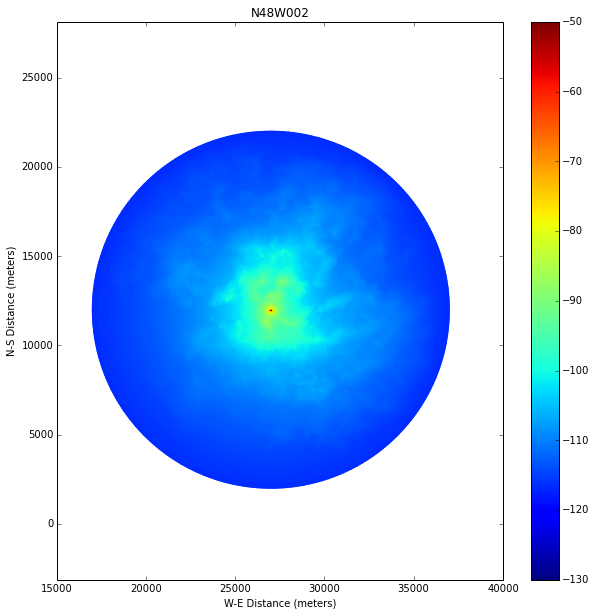

In [24]:
a=z.cover(Ht=2,Hr=2,Rmax=10000)

In [25]:
from IPython.core.display import HTML

def css_styling():
    styles = open("../styles/custom.css", "r").read()
    return HTML(styles)
css_styling()